In [4]:
! wget ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip

--2020-05-01 19:39:34--  ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/cell_images.zip
           => ‘cell_images.zip’
Resolving lhcftp.nlm.nih.gov (lhcftp.nlm.nih.gov)... 130.14.55.35, 2607:f220:41e:7055::35
Connecting to lhcftp.nlm.nih.gov (lhcftp.nlm.nih.gov)|130.14.55.35|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Open-Access-Datasets/Malaria ... done.
==> SIZE cell_images.zip ... 353452851
==> PASV ... done.    ==> RETR cell_images.zip ... done.
Length: 353452851 (337M) (unauthoritative)

cell_images.zip     100%[===================>] 337.08M  9.31MB/s    in 17s     

2020-05-01 19:39:53 (19.3 MB/s) - ‘cell_images.zip’ saved [353452851]



In [5]:
 ! unzip cell_images.zip

Streaming output truncated to the last 5000 lines.
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_91.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_1

In [0]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [0]:

para = "/content/cell_images/Parasitized"
uninf =  "/content/cell_images/Uninfected"


Pimages = os.listdir(para)
Nimages = os.listdir(uninf)

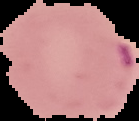

In [8]:
import PIL
image = PIL.Image.open(os.path.join(para, Pimages[20]))
image

In [8]:
np.asarray(image).shape

(121, 139, 3)

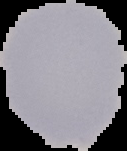

In [9]:
image = PIL.Image.open(os.path.join(uninf, Nimages[20]))
image

Making X and Y(target)

In [0]:
X=[]
y=[]
for i in range(len(Pimages)):
  if 'Thumbs.db' not in Pimages[i]:
    try:
      image = PIL.Image.open(os.path.join(para, Pimages[i]))
      X.append(np.asarray(image.resize((50,50))))
      y.append(1)#class signifying cell is parasitized/infected
    except AttributeError:
      continue
for i in range(len(Nimages)):
  if 'Thumbs.db' not in Nimages[i]:
    try:
      image = PIL.Image.open(os.path.join(uninf, Nimages[i]))
      X.append(np.asarray(image.resize((50,50))))
      y.append(0)#class signifying cell is uninfected
    except AttributeError:
      continue    

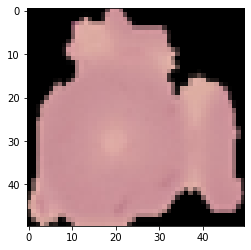

In [10]:
plt.imshow(X[20665], interpolation='nearest')#checking after resizing
plt.show()

Checking the distribution of both classes

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


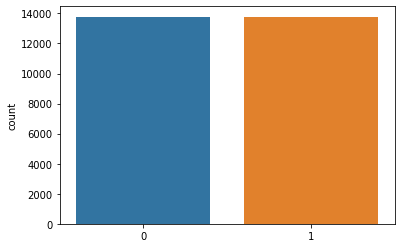

In [12]:
import seaborn as sns
sns.countplot(y)

In [0]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import utils

In [0]:
X=np.array(X)
y=np.array(y)
#splitting x and y into train,validation and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y )
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval,test_size=0.1 )

In [13]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255
print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'Validation samples')
print(X_test.shape[0], 'test samples')
num_classes = 2
# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
y_val = utils.to_categorical(y_val, num_classes)

18601 train samples
2067 Validation samples
6890 test samples


In [14]:
X_train.shape

(18601, 50, 50, 3)

TASK 3.1


In [17]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten, Dropout, BatchNormalization,Conv2D, MaxPooling2D

model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=(50,50,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
res2=model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1,validation_data = [X_val, y_val])

Train on 18601 samples, validate on 2067 samples
Epoch 1/20
18601/18601 [==============================] - 12s 646us/step - loss: 0.7099 - accuracy: 0.6582 - val_loss: 7.8552 - val_accuracy: 0.5075
Epoch 2/20
18601/18601 [==============================] - 5s 285us/step - loss: 0.5290 - accuracy: 0.7390 - val_loss: 9.6379 - val_accuracy: 0.5104
Epoch 3/20
18601/18601 [==============================] - 5s 287us/step - loss: 0.3556 - accuracy: 0.8462 - val_loss: 6.0590 - val_accuracy: 0.5389
Epoch 4/20
18601/18601 [==============================] - 5s 285us/step - loss: 0.2637 - accuracy: 0.8996 - val_loss: 1.0280 - val_accuracy: 0.7291
Epoch 5/20
18601/18601 [==============================] - 5s 288us/step - loss: 0.2276 - accuracy: 0.9152 - val_loss: 0.6657 - val_accuracy: 0.8137
Epoch 6/20
18601/18601 [==============================] - 5s 287us/step - loss: 0.2009 - accuracy: 0.9304 - val_loss: 0.4538 - val_accuracy: 0.8268
Epoch 7/20
18601/18601 [==============================] - 5s 2

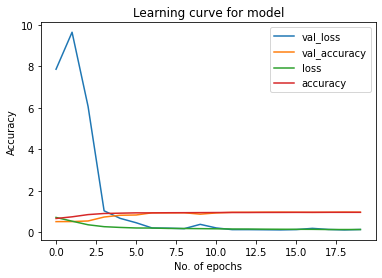

In [18]:
import pandas as pd
pd.DataFrame(res2.history).plot()
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.title("Learning curve for model");

In [19]:
accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test_Accuracy:-', accuracy[1])

Test_Accuracy:- 0.9534107446670532


TASK 3.2

Tried using different combinations of the parameters in ImageDataGenerator and the ones below gave the best results

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    horizontal_flip=True,
    #vertical_flip=True
)

datagen.fit(X_train)

In [54]:
res3=model.fit_generator(datagen.flow(X_train, y_train, batch_size=128), epochs=20,validation_data = [X_val, y_val])

Epoch 1/20
146/146 [==============================] - 14s 95ms/step - loss: 0.1123 - accuracy: 0.9618 - val_loss: 0.1035 - val_accuracy: 0.9681
Epoch 2/20
146/146 [==============================] - 14s 93ms/step - loss: 0.1128 - accuracy: 0.9630 - val_loss: 0.1646 - val_accuracy: 0.9555
Epoch 3/20
146/146 [==============================] - 14s 93ms/step - loss: 0.1156 - accuracy: 0.9610 - val_loss: 0.1085 - val_accuracy: 0.9642
Epoch 4/20
146/146 [==============================] - 14s 93ms/step - loss: 0.1150 - accuracy: 0.9602 - val_loss: 0.1607 - val_accuracy: 0.9482
Epoch 5/20
146/146 [==============================] - 14s 93ms/step - loss: 0.1126 - accuracy: 0.9627 - val_loss: 0.0985 - val_accuracy: 0.9705
Epoch 6/20
146/146 [==============================] - 14s 94ms/step - loss: 0.1096 - accuracy: 0.9620 - val_loss: 0.1156 - val_accuracy: 0.9627
Epoch 7/20
146/146 [==============================] - 14s 93ms/step - loss: 0.1126 - accuracy: 0.9626 - val_loss: 0.1176 - val_accuracy:

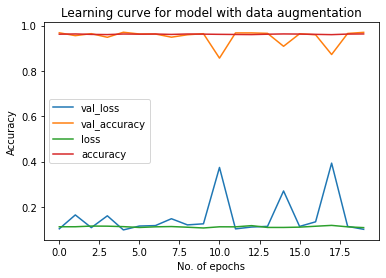

In [56]:
import pandas as pd
pd.DataFrame(res3.history).plot()
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.title("Learning curve for model with data augmentation");

In [57]:
accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test_Accuracy:-', accuracy[1])

Test_Accuracy:- 0.9609578847885132


Adding data augmentation improved the test accuracy slightly from 0.953 to 0.96


TASK 3.3

Without Residual connections

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten, Dropout, BatchNormalization,Conv2D, MaxPooling2D
num_classes = 2
model = {}
inputs = Input(shape=(50, 50, 3))
model["conv1_1"] =  Conv2D(32, (3, 3), activation='relu',padding='same')(inputs)
model["conv1_2"] =  (BatchNormalization())((model["conv1_1"]))
model["conv1_4"] =  (Dropout(0.5))((model["conv1_2"]))
model["conv1_5"] = Conv2D(32, (3, 3), activation='relu',padding='same')(model["conv1_4"])



for i in range(2,15,1):

    feed = model["conv{0}_5".format(i-1)]
    model["conv{0}_1".format(i)] =  Conv2D(32, (3, 3), activation='relu',padding='same')(feed)
    model["conv{0}_2".format(i)] =  (BatchNormalization())((model["conv{0}_1".format(i)])) 
    model["conv{0}_4".format(i)] =  (Dropout(0.5))((model["conv{0}_2".format(i)]))
    model["conv{0}_5".format(i)] = Conv2D(32, (3, 3), activation='relu',padding='same')(model["conv{0}_4".format(i)])

  
maxpool = MaxPooling2D(pool_size=(2, 2))(model["conv{0}_5".format(i-1)])

flat = Flatten()(maxpool)
dense = Dense(128, activation='relu')(flat)
predictions = Dense(num_classes, activation='softmax')(dense)
model_without = Model(inputs=inputs, outputs=predictions)
model_without.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_without_res=model_without.fit(X_train, y_train, batch_size= 128, epochs=20, validation_data=[X_val, y_val], verbose=1)

Train on 18601 samples, validate on 2067 samples
Epoch 1/20
18601/18601 [==============================] - 37s 2ms/step - loss: 1.5895 - accuracy: 0.4982 - val_loss: 0.6929 - val_accuracy: 0.5191
Epoch 2/20
18601/18601 [==============================] - 34s 2ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6930 - val_accuracy: 0.5191
Epoch 3/20
18601/18601 [==============================] - 34s 2ms/step - loss: 0.6932 - accuracy: 0.4945 - val_loss: 0.6932 - val_accuracy: 0.4809
Epoch 4/20
18601/18601 [==============================] - 34s 2ms/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.4809
Epoch 5/20
18601/18601 [==============================] - 34s 2ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6933 - val_accuracy: 0.4809
Epoch 6/20
18601/18601 [==============================] - 34s 2ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.5191
Epoch 7/20
18601/18601 [==============================] - 34s 2ms/ste

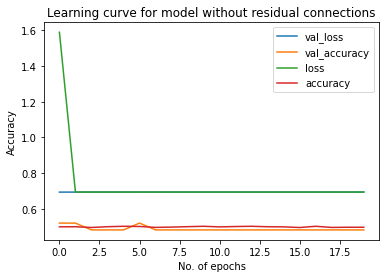

In [25]:
import pandas as pd
pd.DataFrame(model_without_res.history).plot()
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.title("Learning curve for model without residual connections");

In [20]:
accuracy = model_without.evaluate(X_test, y_test, verbose=0)
print('Test_Accuracy:-', accuracy[1])

Test_Accuracy:- 0.5023221969604492


With Residual connections(added skip connections in alternate layers)

In [21]:
model = {}
inputs = Input(shape=(50, 50, 3))
model["conv1_1"] =  Conv2D(32, (3, 3), activation='relu',padding='same')(inputs)
model["conv1_2"] =  (BatchNormalization())((model["conv1_1"]))
model["conv1_4"] =  (Dropout(0.5))((model["conv1_2"]))
model["conv1_5"] = Conv2D(32, (3, 3), activation='relu',padding='same')(model["conv1_4"])



for i in range(2,15,1):
  
    if i%2 != 0:
        feed = skip
    else:
        feed = model["conv{0}_5".format(i-1)]
    model["conv{0}_1".format(i)] =  Conv2D(32, (3, 3), activation='relu',padding='same')(feed)
    model["conv{0}_2".format(i)] =  (BatchNormalization())((model["conv{0}_1".format(i)]))
    model["conv{0}_4".format(i)] =  (Dropout(0.5))((model["conv{0}_2".format(i)]))
    model["conv{0}_5".format(i)] = Conv2D(32, (3, 3), activation='relu',padding='same')(model["conv{0}_4".format(i)])

    if i%2 == 0:
        skip = keras.layers.Add()([model["conv{0}_5".format(i-1)],model["conv{0}_5".format(i)]])
  
maxpool = MaxPooling2D(pool_size=(2, 2))(model["conv{0}_5".format(i-1)])

flat = Flatten()(maxpool)
dense = Dense(128, activation='relu')(flat)
predictions = Dense(num_classes, activation='softmax')(dense)
model_with = Model(inputs=inputs, outputs=predictions)
model_with.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_with_res=model_with.fit(X_train, y_train, batch_size= 128, epochs=20, validation_data=[X_val, y_val], verbose=1)

Train on 18601 samples, validate on 2067 samples
Epoch 1/20
18601/18601 [==============================] - 38s 2ms/step - loss: 2.2228 - accuracy: 0.5200 - val_loss: 0.6934 - val_accuracy: 0.4809
Epoch 2/20
18601/18601 [==============================] - 34s 2ms/step - loss: 0.6908 - accuracy: 0.5457 - val_loss: 0.6944 - val_accuracy: 0.4809
Epoch 3/20
18601/18601 [==============================] - 34s 2ms/step - loss: 0.6898 - accuracy: 0.5557 - val_loss: 0.6956 - val_accuracy: 0.4809
Epoch 4/20
18601/18601 [==============================] - 34s 2ms/step - loss: 0.6893 - accuracy: 0.5484 - val_loss: 0.6971 - val_accuracy: 0.4809
Epoch 5/20
18601/18601 [==============================] - 34s 2ms/step - loss: 0.6887 - accuracy: 0.5487 - val_loss: 0.6984 - val_accuracy: 0.4809
Epoch 6/20
18601/18601 [==============================] - 34s 2ms/step - loss: 0.6877 - accuracy: 0.5516 - val_loss: 0.6996 - val_accuracy: 0.4809
Epoch 7/20
18601/18601 [==============================] - 34s 2ms/ste

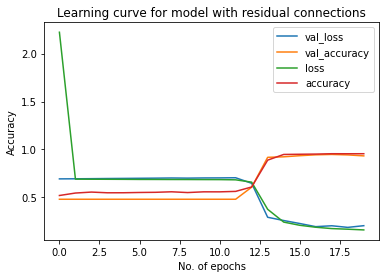

In [26]:
pd.DataFrame(model_with_res.history).plot()
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.title("Learning curve for model with residual connections");

In [23]:
accuracy = model_with.evaluate(X_test, y_test, verbose=0)
print('Test_Accuracy:-', accuracy[1])

Test_Accuracy:- 0.9419448375701904


Model with residual connections performed much better than model without residual connections. Accuracy on test set increased from 0.5 to 0.94. 

In Conclusion, the Residual Connection is a very interesting extension to Deep Convolutional Networks that have empirically shown to increase performance in Image classification. 